<a href="https://colab.research.google.com/github/ajaybalakrishnan/animal-classification/blob/master/animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#%reload_ext autoreload
#%autoreload 2
%matplotlib inline

In [2]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 41.5MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
import os
import io
import tarfile
import numpy as np
import PIL


from fastai.vision import *

In [0]:
os.environ["KAGGLE_USERNAME"]="ajayabk"
os.environ["KAGGLE_KEY"]="bc5f1a212ec05147cc4fe6856dc30507"

In [5]:
! kaggle datasets download -d alessiocorrado99/animals10

 99% 582M/586M [00:14<00:00, 46.4MB/s]
100% 586M/586M [00:14<00:00, 41.1MB/s]


In [6]:
! unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3Xbf3ulUg4DQ_EwHaFz.jpeg  
  inflating: raw-img/ragno/OIP-Mj15wALS

In [0]:
train=Path("/content/raw-img")

In [0]:
classes=os.listdir("/content/raw-img")

In [9]:
for c in classes:
  verify_images(train/c,delete=True,max_workers=10)

In [0]:
np.random.seed(18)
src = (ImageList.from_folder(train)
      .split_by_rand_pct(valid_pct=0.2)
      .label_from_folder())


In [0]:
tfdm= get_transforms(max_rotate=25, max_warp=0.2)

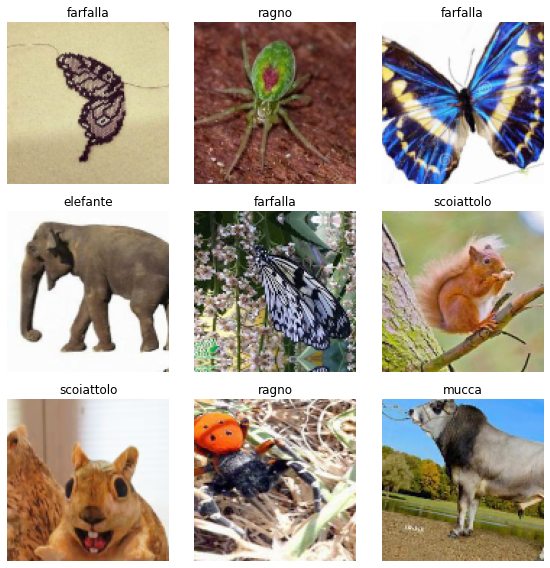

In [12]:
data =  (src.transform(tfdm, size=112)
            .databunch(bs=64)
            .normalize(imagenet_stats))

data.show_batch(rows=3,figsize=(8,8))

In [13]:
learner34 = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


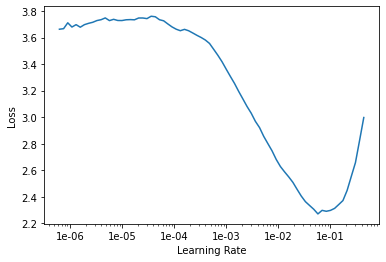

In [14]:
learner34.lr_find()
learner34.recorder.plot()

In [0]:
lr = 1e-03

In [17]:
learner34.fit_one_cycle(10, max_lr= slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.389301,0.266625,0.913658,03:10
1,0.385444,0.266448,0.916332,03:09
2,0.361856,0.245351,0.923018,03:09
3,0.310773,0.228157,0.927603,03:08
4,0.316234,0.218220,0.930468,03:08
5,0.274791,0.210811,0.933333,03:09
6,0.264439,0.200303,0.937345,03:08
7,0.258975,0.198272,0.940974,03:06
8,0.253699,0.196792,0.938491,03:03
9,0.245136,0.193578,0.939828,03:03


In [0]:
learner34.save("resnet32-prototype")

In [19]:
learner50 = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


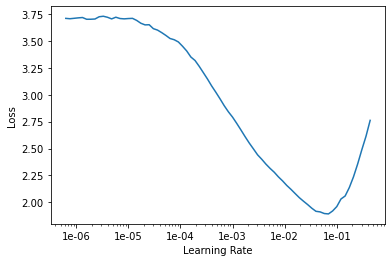

In [20]:
learner50.lr_find()
learner50.recorder.plot()

In [21]:
learner50.fit_one_cycle(10, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.600530,0.339518,0.899140,03:25
1,0.457702,0.284180,0.912512,03:23
2,0.336138,0.244569,0.924928,03:23
3,0.311120,0.219133,0.936008,03:23
4,0.277246,0.196705,0.941356,03:25
5,0.229720,0.187965,0.941738,03:26
6,0.217642,0.174853,0.947278,03:26
7,0.172292,0.169711,0.949952,03:27
8,0.182073,0.166889,0.949188,03:28
9,0.172900,0.169045,0.951098,03:28


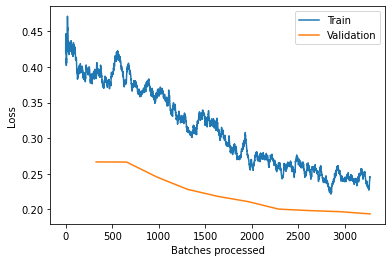

In [22]:
learner34.recorder.plot_losses()

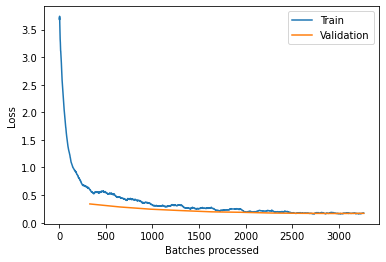

In [23]:
learner50.recorder.plot_losses()

In [0]:
learner50.save('resnet50-prototype1')

In [25]:
interp = ClassificationInterpretation.from_learner(learner50)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

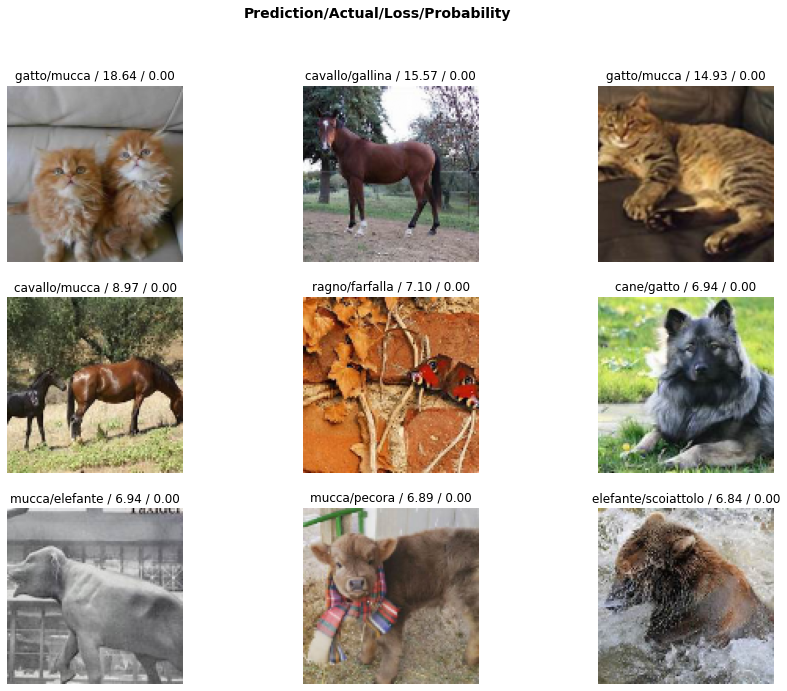

In [26]:
  interp.plot_top_losses(9, figsize=(15,11))

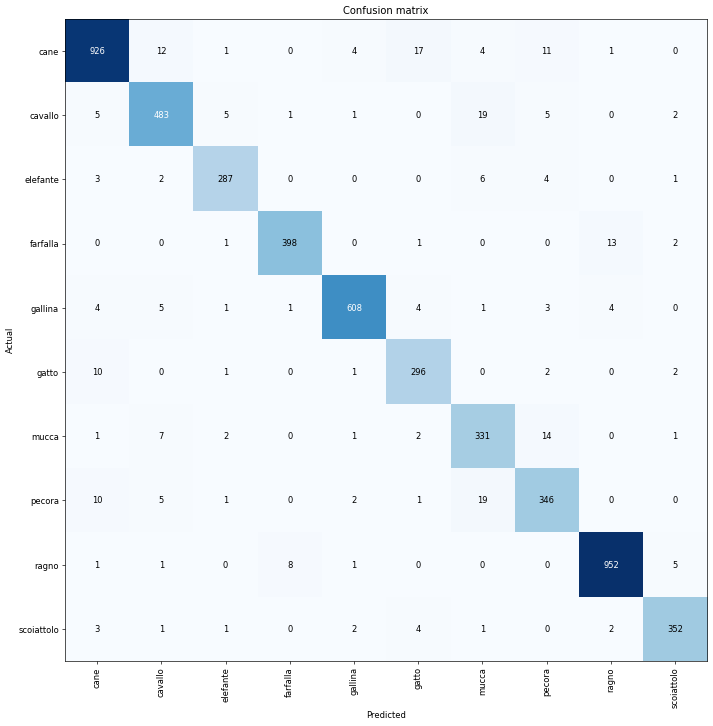

In [27]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [28]:
interp.most_confused(min_val=2)

[('cavallo', 'mucca', 19),
 ('pecora', 'mucca', 19),
 ('cane', 'gatto', 17),
 ('mucca', 'pecora', 14),
 ('farfalla', 'ragno', 13),
 ('cane', 'cavallo', 12),
 ('cane', 'pecora', 11),
 ('gatto', 'cane', 10),
 ('pecora', 'cane', 10),
 ('ragno', 'farfalla', 8),
 ('mucca', 'cavallo', 7),
 ('elefante', 'mucca', 6),
 ('cavallo', 'cane', 5),
 ('cavallo', 'elefante', 5),
 ('cavallo', 'pecora', 5),
 ('gallina', 'cavallo', 5),
 ('pecora', 'cavallo', 5),
 ('ragno', 'scoiattolo', 5),
 ('cane', 'gallina', 4),
 ('cane', 'mucca', 4),
 ('elefante', 'pecora', 4),
 ('gallina', 'cane', 4),
 ('gallina', 'gatto', 4),
 ('gallina', 'ragno', 4),
 ('scoiattolo', 'gatto', 4),
 ('elefante', 'cane', 3),
 ('gallina', 'pecora', 3),
 ('scoiattolo', 'cane', 3),
 ('cavallo', 'scoiattolo', 2),
 ('elefante', 'cavallo', 2),
 ('farfalla', 'scoiattolo', 2),
 ('gatto', 'pecora', 2),
 ('gatto', 'scoiattolo', 2),
 ('mucca', 'elefante', 2),
 ('mucca', 'gatto', 2),
 ('pecora', 'gallina', 2),
 ('scoiattolo', 'gallina', 2),
 ('sco

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


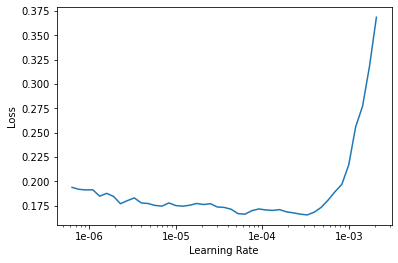

In [29]:
learner50.unfreeze()
learner50.lr_find()
learner50.recorder.plot()

In [30]:
learner50.fit_one_cycle(3, max_lr=slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy,time
0,0.175371,0.165084,0.949952,03:39
1,0.139752,0.147665,0.956829,03:38
2,0.095928,0.137598,0.960267,03:38


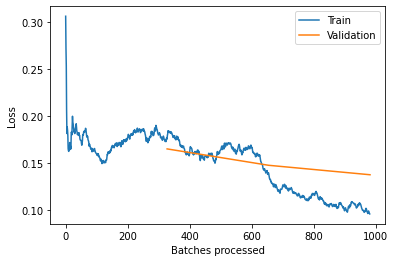

In [31]:
learner50.recorder.plot_losses()

In [32]:
interp = ClassificationInterpretation.from_learner(learner50)

In [33]:
interp.most_confused(min_val=1)

[('gatto', 'cane', 18),
 ('cane', 'cavallo', 13),
 ('pecora', 'mucca', 13),
 ('farfalla', 'ragno', 12),
 ('cavallo', 'mucca', 10),
 ('pecora', 'cane', 10),
 ('cane', 'gatto', 9),
 ('cane', 'pecora', 7),
 ('mucca', 'pecora', 7),
 ('cavallo', 'cane', 6),
 ('elefante', 'pecora', 6),
 ('mucca', 'cavallo', 6),
 ('pecora', 'cavallo', 5),
 ('ragno', 'farfalla', 5),
 ('farfalla', 'gallina', 4),
 ('ragno', 'scoiattolo', 4),
 ('scoiattolo', 'cane', 4),
 ('cane', 'gallina', 3),
 ('elefante', 'mucca', 3),
 ('gallina', 'cane', 3),
 ('gallina', 'cavallo', 3),
 ('pecora', 'gallina', 3),
 ('cane', 'mucca', 2),
 ('cavallo', 'elefante', 2),
 ('cavallo', 'pecora', 2),
 ('elefante', 'cane', 2),
 ('farfalla', 'scoiattolo', 2),
 ('gallina', 'pecora', 2),
 ('gallina', 'ragno', 2),
 ('gallina', 'scoiattolo', 2),
 ('gatto', 'elefante', 2),
 ('gatto', 'scoiattolo', 2),
 ('mucca', 'elefante', 2),
 ('mucca', 'gallina', 2),
 ('mucca', 'gatto', 2),
 ('ragno', 'cane', 2),
 ('ragno', 'gallina', 2),
 ('scoiattolo', 'c

In [37]:
y_hat, y , loss= learner34.get_preds(with_loss=True)

In [38]:
y_hat

tensor([[3.5160e-05, 1.3865e-06, 3.4097e-06,  ..., 2.9813e-07, 1.9922e-04,
         9.9919e-01],
        [5.4910e-02, 1.6203e-01, 2.8113e-03,  ..., 1.4847e-01, 5.3952e-05,
         5.4124e-05],
        [1.7824e-04, 2.2892e-06, 2.5335e-07,  ..., 2.8031e-07, 3.5486e-05,
         9.9561e-01],
        ...,
        [7.1987e-03, 2.3619e-02, 5.5069e-01,  ..., 1.2859e-01, 7.7143e-04,
         5.4634e-04],
        [3.9359e-04, 6.0679e-06, 3.7107e-05,  ..., 1.1178e-04, 1.8725e-04,
         9.9864e-01],
        [2.3847e-05, 1.8866e-05, 6.7244e-06,  ..., 1.7276e-06, 1.4307e-03,
         4.7463e-07]])

In [39]:
y

tensor([9, 6, 9,  ..., 7, 9, 3])

In [40]:
loss

tensor([8.0577e-04, 4.6327e-01, 4.4041e-03,  ..., 2.0512e+00, 1.3628e-03,
        1.5367e-03])

In [0]:
y_hat=y_hat.argmax(dim=1)

In [42]:
data.classes

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       976
           1       0.91      0.91      0.91       521
           2       0.95      0.92      0.94       303
           3       0.96      0.94      0.95       415
           4       0.97      0.96      0.97       631
           5       0.95      0.93      0.94       312
           6       0.82      0.90      0.86       359
           7       0.90      0.89      0.90       384
           8       0.97      0.98      0.97       968
           9       0.95      0.94      0.95       366

    accuracy                           0.94      5235
   macro avg       0.93      0.93      0.93      5235
weighted avg       0.94      0.94      0.94      5235

